# Decision Tree Classifier for bank loan

In this notebook, we will build a decision tree classifier using the scikit-learn library. We will use a hypothetical employee attrition dataset for this example.

## Import Libraries
First, let's import the necessary libraries.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

## Load and Explore the Dataset
Next, we will load the employee attrition dataset and explore its contents.

In [2]:
# Load the dataset
df = pd.read_csv('bank_loan_appln.csv')

# Display the first few rows of the DataFrame
df.head()

,ID,Age,Has_job,Own_house,Credit_rating,Outcome
0,1,young,False,False,fair,Reject
1,2,young,False,False,good,Reject
2,3,young,True,False,good,Approve
3,4,young,True,True,fair,Approve
4,5,young,False,False,fair,Reject


## Preprocess the Data
We need to preprocess the data, including handling categorical variables and missing values if any.
Also to perform encoding of the data

In [3]:
# Check for missing values
print(df.isnull().sum())

# For simplicity, let's assume there are no missing values in this example.
# If there are, you can handle them with techniques like imputation or dropping rows/columns.

from sklearn.calibration import LabelEncoder

#Drop those columns that are deemed to be useless to our analysis
X = df.drop(columns=['Outcome','ID'], axis=1)
y = df['Outcome']

#Perform encoding
le = LabelEncoder()
# Encode categorical features
X['Age'] = le.fit_transform(df['Age'])
X['Has_job'] = df['Has_job'].astype(int)  # Convert boolean to int
X['Own_house'] = df['Own_house'].astype(int)  # Convert boolean to int
X['Credit_rating'] = le.fit_transform(df['Credit_rating'])
print(X)

ID               0
Age              0
Has_job          0
Own_house        0
Credit_rating    0
Outcome          0
dtype: int64
    Age  Has_job  Own_house  Credit_rating
0     2        0          0              1
1     2        0          0              2
2     2        1          0              2
3     2        1          1              1
4     2        0          0              1
5     0        0          0              1
6     0        0          0              2
7     0        1          1              2
8     0        0          1              0
9     0        0          1              0
10    1        0          1              0
11    1        0          1              2
12    1        1          0              2
13    1        1          0              0
14    1        0          0              1


## Split the Dataset
We will split the dataset into training and testing sets.

In [4]:
# Split the dataset into features (X) and target (y)
# Assuming 'Outcome' is the target variable

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Train the Decision Tree Classifier
First, let's train a decision tree classifier on the training data.

In [5]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=10,random_state=42)
#dt_classifier.fit(X_train, y_train)
# This is where the splitting of nodes happened
dt_classifier.fit(X, y)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X)

print(y_pred_dt)
# Testing
arr = np.array([[0,1,0,1]])
print(dt_classifier.predict(arr))



['Reject' 'Reject' 'Approve' 'Approve' 'Reject' 'Reject' 'Reject'
 'Approve' 'Approve' 'Approve' 'Approve' 'Approve' 'Approve' 'Approve'
 'Reject']
['Approve']


c:\Users\lctan\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Evaluate the Decision Tree Model
Let's evaluate the decision tree model's performance.

In [6]:
# Calculate the accuracy of the decision tree model
accuracy_dt = accuracy_score(y, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

Decision Tree Accuracy: 1.00


## Visualize the Decision Tree
We can visualize the decision tree to better understand the model.

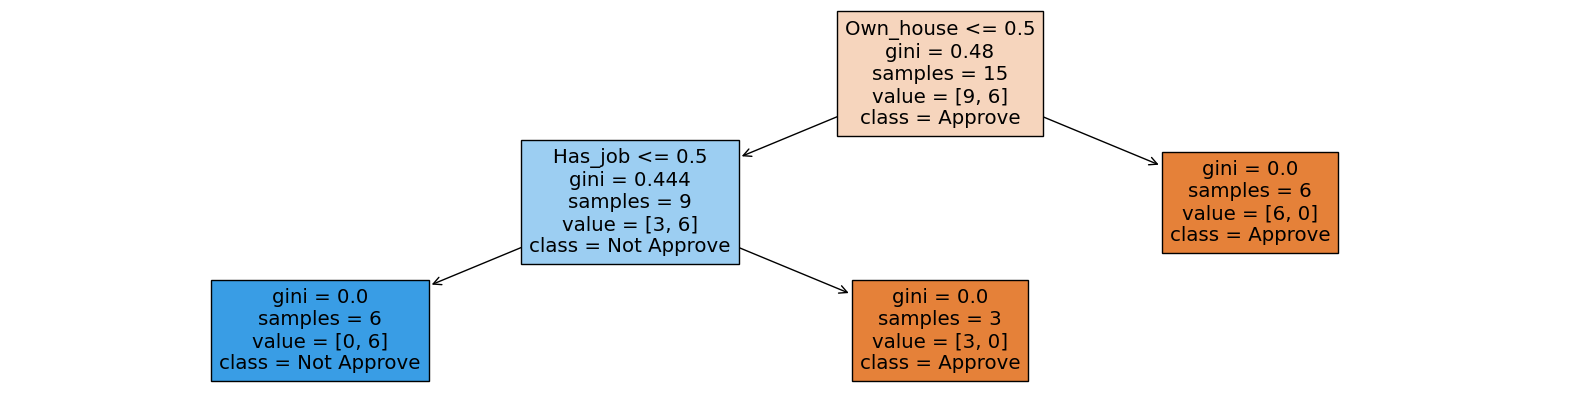

In [7]:
# Plot the decision tree
plt.figure(figsize=(20,5))

custom_feature_names = ['Age', 'Has Job', 'Own House', 'Credit Rating']
custom_class_names = ['Approve','Not Approve']

plot_tree(dt_classifier, feature_names=X.columns, class_names=custom_class_names, filled=True)
#plot_tree(dt_classifier, filled=True, max_depth=4)
plt.show()

